In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("titanic_train.csv")

print(str(data.shape) + "/n")

data.head()

(891, 12)/n


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.drop("PassengerId", axis =1, inplace=True)

print(str(data.shape))

(891, 11)


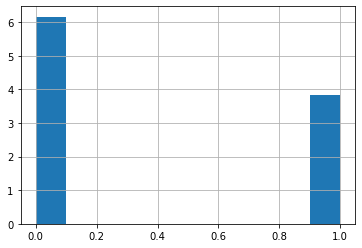

In [4]:
data["Survived"].hist(bins=10, density=True)
plt.show()

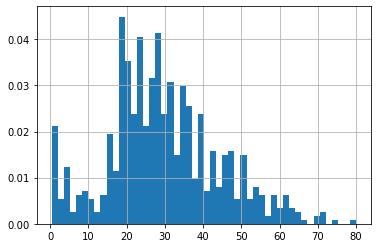

In [5]:
data["Age"].hist(bins=50, density=True)
plt.show()

TypeError: loop of ufunc does not support argument 0 of type AxesSubplot which has no callable log method

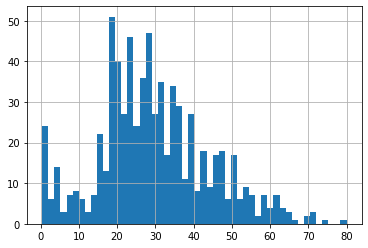

In [6]:
#transformacion con log 
np.log(data["Age"].hist(bins=50, density=False))
plt.show()

In [7]:
#Tipos de variables en X

In [8]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
categorica = [var for var in data.columns if data[var].dtype =="O"]
categorica = categorica + ["Pclass"]

In [10]:
len(categorica)

6

In [11]:
data[categorica]=data[categorica].astype("O")
data[categorica].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Pclass      object
dtype: object

In [12]:
#Variables numericas1
numericas = [var for var in data.columns if (var not in categorica and var !="Age")]

In [13]:
data[numericas].dtypes

Survived      int64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [14]:
#faltantes
Nas = [var for var in data.columns if (data[var].isnull().sum()>0)]
len(Nas)

3

In [15]:
#variables discretas
len(data["Fare"].unique()) <20 #es continua

False

In [16]:
discretas = [var for var in numericas if(len(data[var].unique())<20)]
discretas

['Survived', 'SibSp', 'Parch']

In [17]:
print("Cantidad de variables discretas: ", len(discretas))

Cantidad de variables discretas:  3


In [18]:
data[discretas].head()

,Survived,SibSp,Parch
0,0,1,0
1,1,1,0
2,1,0,0
3,1,1,0
4,0,0,0


In [19]:
import seaborn as sns

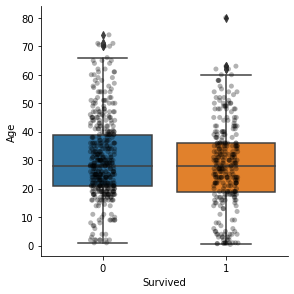

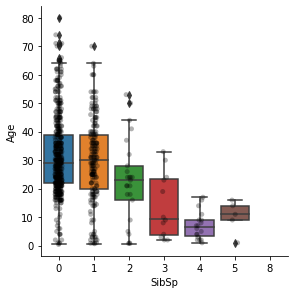

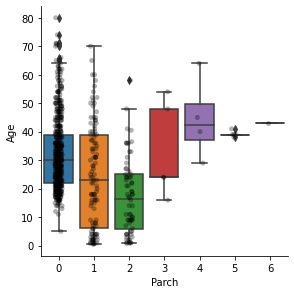

In [20]:
for var in discretas:
    sns.catplot(x=var, y="Age", data=data, kind="box", height=4)
    sns.stripplot(x=var, y="Age", data=data, jitter=0.1, alpha=0.3, color="k")
    plt.show()
#No tiene inferencia 

In [21]:
#Variables continuas
continuas = [var for var in numericas if(len(data[var].unique())>20)]

In [22]:
print("Variables continuas: ", len(continuas))

Variables continuas:  1


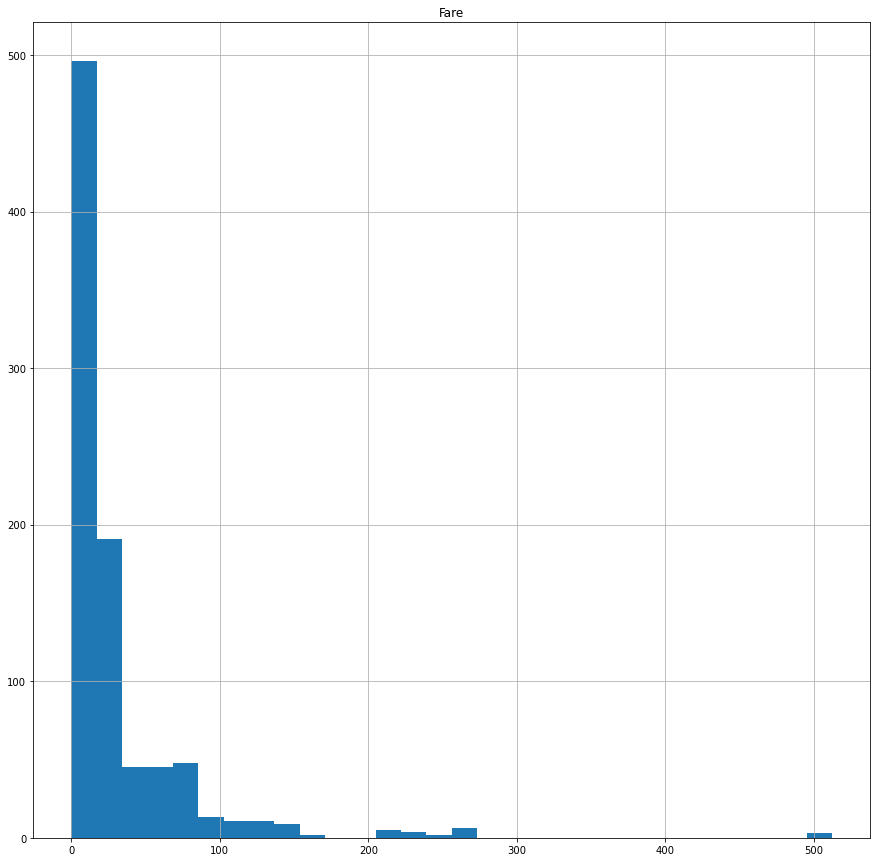

In [23]:
data[continuas].hist(bins=30, figsize=(15,15))
plt.show()

In [24]:
import scipy.stats as stats

In [25]:
temp = data.copy()

In [26]:
for var in continuas:
    temp[var], param=stats.yeojohnson(data[var])

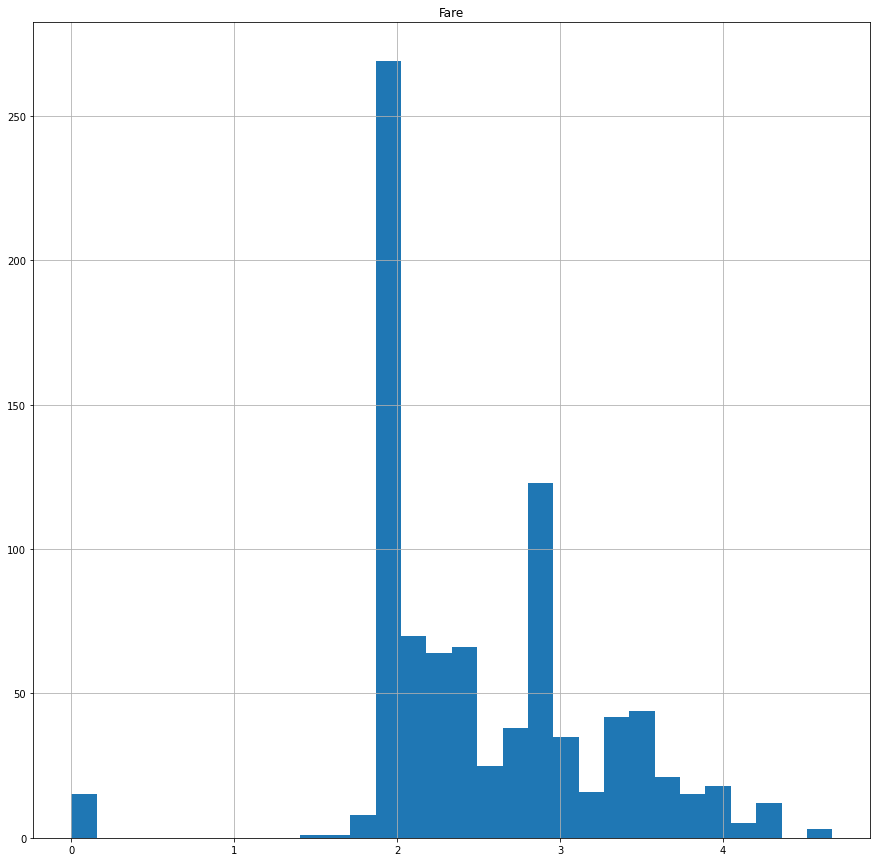

In [27]:
temp[continuas].hist(bins=30, figsize=(15,15))
plt.show()

<AxesSubplot:>

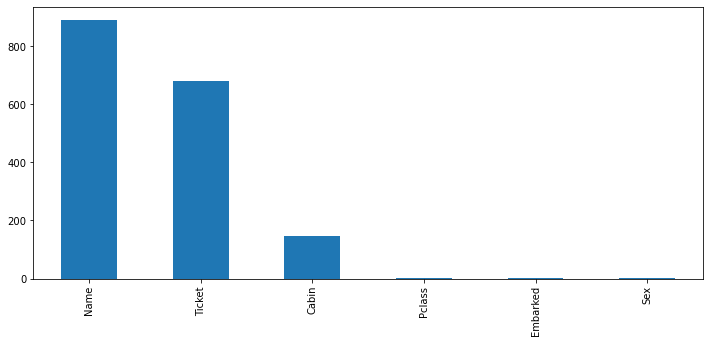

In [28]:
data[categorica].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [29]:
np.unique(data["Sex"])

array(['female', 'male'], dtype=object)

In [30]:
np.unique(data["Pclass"])

array([1, 2, 3], dtype=object)

In [32]:
np.unique(str(data["Embarked"]))

array(['0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object'],
      dtype='<U141')

In [65]:
np.unique(data["Ticket"])

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

In [33]:
quality_mapping = {"female":1, "male":2, "NaN":0, "S":3, "C":4}

In [34]:
qual_vars = {"Sex", "Embarked"}

In [35]:
for var in qual_vars:
    data[var]=data[var].map(quality_mapping)

In [36]:
data[qual_vars].head()

,Sex,Embarked
0,2,3.0
1,1,4.0
2,1,3.0
3,1,3.0
4,2,3.0


In [37]:
qual_vars = qual_vars + ["Survived", "Age", "Pclass"]

TypeError: unsupported operand type(s) for +: 'set' and 'list'